##Project 1: CÁC THUẬT TOÁN PHÂN LỚP HOA LAN (HỌC CÓ GIÁM SÁT)
---
Mô tả dự án:
  Có 3 loại hoa Iris bao gồm:
*   Iris Setosa;
*   Iris Versicolour;
*   Iris Virginica

Yêu cầu: Dựa vào các đặc điểm của một loại hoa Iris(lá, cánh hóa) để phân nó vào 1 trong 3 lớp ở trên.
![alt text](https://thegoodpython.com/assets/images/iris-species.png)


Tập dữ liệu bao gồm: 150 bản ghi (Tương ứng với 150 mẫu - Mỗi loại hoa có 50 mẫu). Mỗi mẫu bao gồm 4 thuộc tính phân lớp và một thuộc tính outcome (label):
1.   Chiều dài lá, Dữ liệu số (cm)
2.   Độ rộng lá, Dữ liệu số (cm)
3.  Chiều dài cánh hoa, Dữ liệu số (cm)
4.  Độ rộng cánh hoa, Dữ liệu số (cm)
5. Class (Outcome - cho biết mẫu này là loại hoa nào: iris-setosa; iris-versicolour; iris-virginica

**MỘT SỐ ĐIỂM CHÚ Ý CỦA PROJECT**
* Làm quen với cách sử dụng các thuật toán học máy với thư viện sklearn
* Trực quan hóa theo thuật toán Decision Tree

----
dangvannam@Department of Computer Science@FIT-HUMG

In [10]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


## 1) Tải tập dữ liệu mẫu Iris
---
Tập dữ liệu mẫu được tải về biến data (kiểu DataFrame) bao gồm 150 mẫu.
Mỗi mẫu bao gồm các thông tin:
 
 ID       --   sepal_length  --    sepal_width    --  petal_length   --  petal_width      ---    class
  
126------- 6.2    ---------------------   2.8    ------------------  4.8   --------------  1.8  -------------- Iris-virginica

79  ---------  5.7 ------------------2.6  ----------------------3.5 --------------- 1.0 -------------- Iris-versicolor

Tập dữ liệu được tách thành 2 tập:


*   Train (0.8): 120 mẫu
*   Test(0.2): 30 mẫu




In [11]:
#Tải dữ liệu
path="Data1_IrisFlowers\iris_flowers.csv"
data=pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3    petal_width  150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [13]:
print("Số lượng hoa trong mỗi lớp: ")
print(pd.value_counts(data['class']))

Số lượng hoa trong mỗi lớp: 
iris_setosa        50
iris_versicolor    50
iris_virginica     50
Name: class, dtype: int64


In [14]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##2) Trực quan hóa tập dữ liệu train
---


HIỂN THỊ CÁC BIỂU ĐỒ PHÂN TÍCH TẬP DỮ LIỆU
Số lượng mẫu theo mỗi lớp


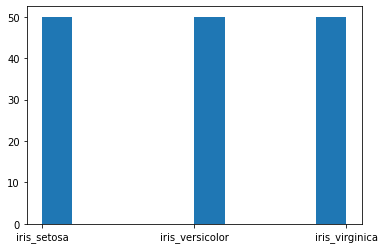

Chiều dài lá


c:\Users\NAB\anaconda3\envs\nabang1010\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


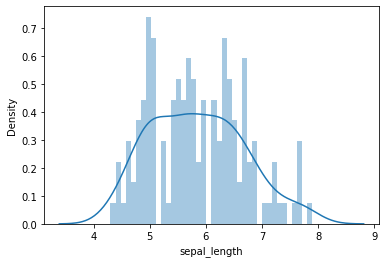

Độ rộng lá


c:\Users\NAB\anaconda3\envs\nabang1010\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


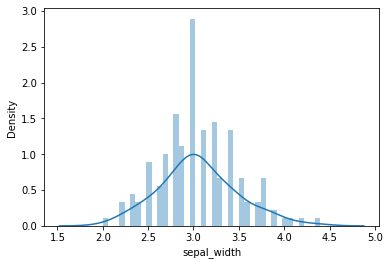

c:\Users\NAB\anaconda3\envs\nabang1010\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Chiều dài cánh hoa


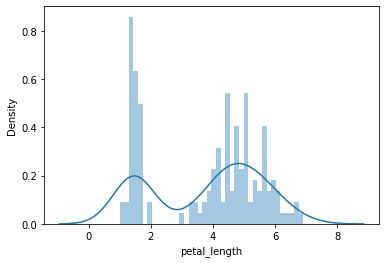

c:\Users\NAB\anaconda3\envs\nabang1010\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Độ rộng cánh hoa


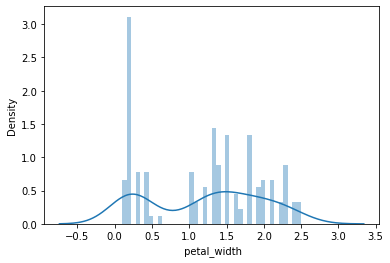

In [15]:
#Exploratory data analysis
print("HIỂN THỊ CÁC BIỂU ĐỒ PHÂN TÍCH TẬP DỮ LIỆU")
print("Số lượng mẫu theo mỗi lớp")
plt.hist(data['class'])
plt.show()
print("Chiều dài lá")
sns.distplot(data['sepal_length'],kde=True,bins=40)
plt.show()
print("Độ rộng lá")
sns.distplot(data['sepal_width'],kde=True,bins=40)
plt.show()
print("Chiều dài cánh hoa")
sns.distplot(data['petal_length'],kde=True,bins=40)
plt.show()
print("Độ rộng cánh hoa")
sns.distplot(data[' petal_width'],kde=True,bins=40)
plt.show()

bivariate analysis


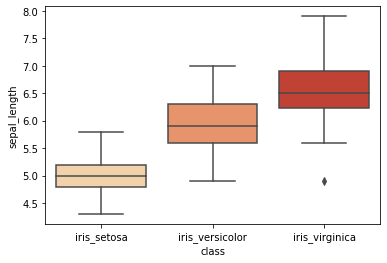

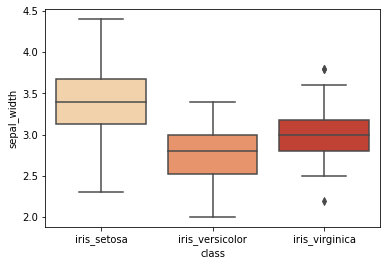

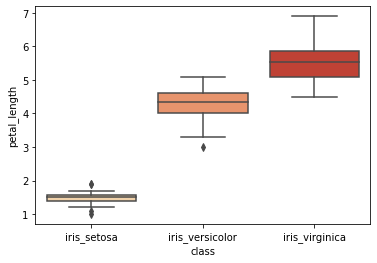

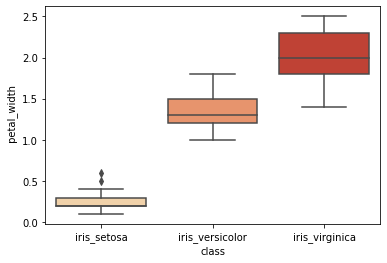

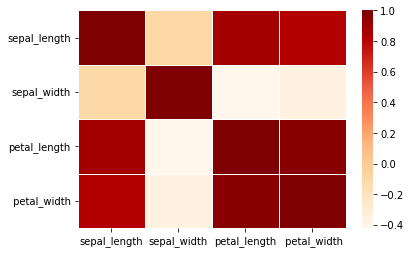

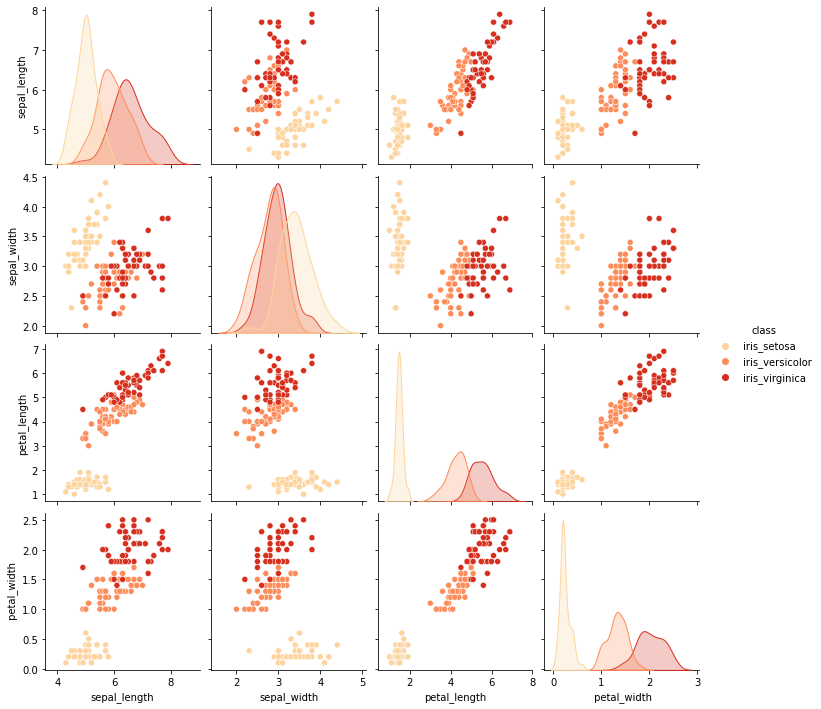

In [16]:
print("bivariate analysis")
sns.boxplot(x='class',y='sepal_length',data=data,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='sepal_width',data=data,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='petal_length',data=data,palette='OrRd')
plt.show()
sns.boxplot(x='class',y=' petal_width',data=data,palette='OrRd')
plt.show()
sns.heatmap(data.corr(),cmap="OrRd", linecolor='white', linewidths=1)
plt.show()
sns.pairplot(data, hue='class',palette='OrRd')
plt.show()

## 3) Chuẩn bị dữ liệu 
---

In [17]:
data_new = data.copy()

#Chuyển dữ liệu categorical của thuộc tính class về số (LabelenCoder)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
#label_num = [['Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2]]
#enc.fit(datanew[['class']])
data_new[['class']] = enc.fit_transform(data_new[['class']])
data_new[['class']] = data_new[['class']].astype(int)
data_new

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


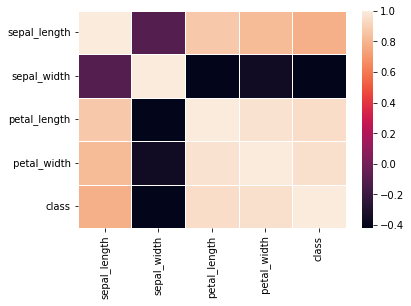

In [18]:
sns.heatmap(data_new.corr(), linecolor='white', linewidths=1)
plt.show()

In [19]:
#Tách tập dữ liệu data thành 2 phần train/test theo tỷ lệ 80 - 20
train,test = train_test_split(data_new,test_size=0.2,random_state=7)

#Quan sát thông tin của tập dữ liệu
print("Kích thước tập Train:   ",train.shape)
print("Số lượng mỗi loại hoa trong tập Train: ")
print(pd.value_counts(train['class']))
print('-----------------------------------------------------------')
print("Kích thước tập Test:    ",test.shape)
print("Số lượng mỗi loại hoa trong a tập Test: ")
print(pd.value_counts(test['class']))

NameError: name 'train_test_split' is not defined

In [ ]:
#Tách tập train ra thành 2 phần Input (X_train)|Output (Y_Train)
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1]

print(X_train.head())
print(Y_train.head())

     sepal_length  sepal_width  petal_length   petal_width
126           6.2          2.8           4.8           1.8
79            5.7          2.6           3.5           1.0
22            4.6          3.6           1.0           0.2
139           6.9          3.1           5.4           2.1
74            6.4          2.9           4.3           1.3
126    2
79     1
22     0
139    2
74     1
Name: class, dtype: int64


In [ ]:
#Tách tập TEST ra thành 2 phần Input (X_test)|Output (Y_Test)
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]

print(X_test.head())
print(Y_test.head())

     sepal_length  sepal_width  petal_length   petal_width
149           5.9          3.0           5.1           1.8
84            5.4          3.0           4.5           1.5
40            5.0          3.5           1.3           0.3
66            5.6          3.0           4.5           1.5
106           4.9          2.5           4.5           1.7
149    2
84     1
40     0
66     1
106    2
Name: class, dtype: int64


#3) Xây dựng các mô hình phân lớp
---

## 3.1) Thuật toán Decision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import tree
from IPython.display import Image  
import numpy as np

In [ ]:
#Xây dựng và huấn luyện với model: Decision Tree
clf = DecisionTreeClassifier(random_state=0)

# Huấn luyên mô hình
model_tree = clf.fit(X_train, Y_train)
print("Độ chính xác của tập huấn luyện:",model_tree.score(X_train,Y_train))

Độ chính xác của tập huấn luyện: 1.0


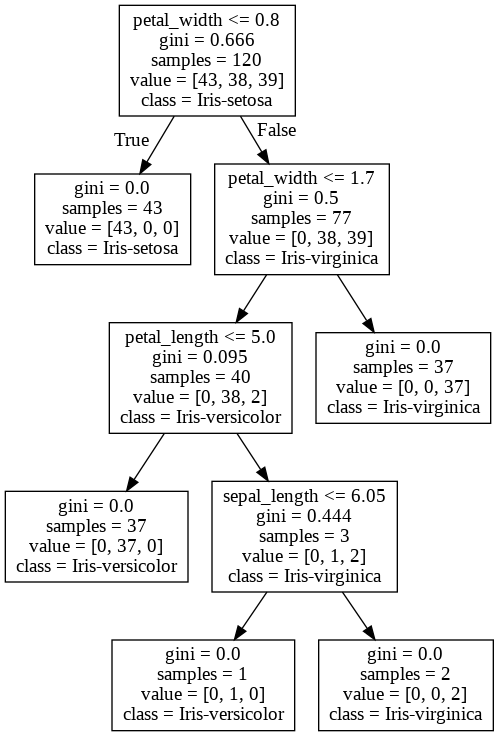

In [ ]:
# Trực quan hóa dữ liệu huấn luyện
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=['sepal_length','sepal_width','petal_length','petal_width'],  
                                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:

#Dự đoán với model đã thu được:
y_predict = model_tree.predict(X_test)

print('Kết quả phân loại với tập test:',y_predict)
print('      Dữ liệu gốc của tập test:',Y_test.to_numpy())
#Đánh giá độ chính xác của tập test
from sklearn.metrics import accuracy_score
print("Độ chính xác với tập TEST:  %2.4f" % accuracy_score(Y_test,y_predict))

Kết quả phân loại với tập test: [2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
      Dữ liệu gốc của tập test: [2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]
Độ chính xác với tập TEST:  0.9000


In [ ]:
#Hiển thị confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, y_predict)

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#f, ax = plt.subplots(1,2, figsize=(14,6))
# Plot non-normalized confusion matrix
class_names = [0, 1,2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


NameError: ignored

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


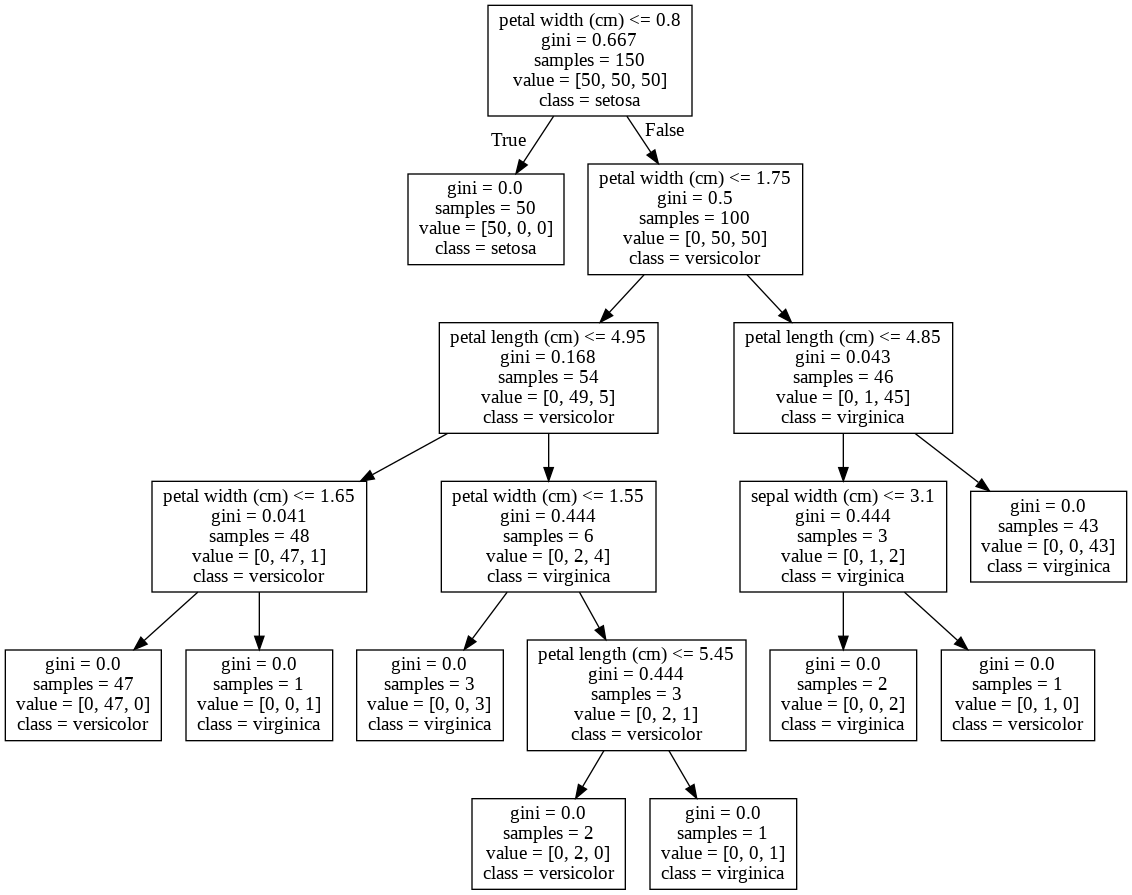

In [ ]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
        

In [ ]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

#lets make prediction on test data

In [ ]:
#lets make prediction on test data

# Make predictions on validation dataset
print("SVC Performance")
SVM = SVC()
SVM.fit(X,y)
#print(test.iloc[:,:-1])
predictions = SVM.predict(test.iloc[:,:-1])
print(predictions)
#print(y_test)
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

SVC Performance
[2 0 1 0 2 1 0 0 1 0 2 0 1 2 1 2 2 2 1 1 0 2 0 2 2 2 0 0 2 2]
0.9333333333333333
[[10  0  2]
 [ 0  7  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00         7
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
print("KNN Performance")
KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,:-1])
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

KNN Performance
0.9
[[11  0  1]
 [ 0  7  0]
 [ 2  0  9]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       1.00      1.00      1.00         7
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

